In [62]:
import numpy as np
from scipy.stats import norm, ncx2, chi2
import matplotlib.colors
import matplotlib.pyplot as plt

In [72]:
df = 2
max_llr = 25.

llr = np.linspace(0.,max_llr,200)

median_q = []
pvals = []
significances = []

for x in llr:
    median_q.append(ncx2.ppf(0.5, df=df, nc=max(0.,x)))
    pvals.append(chi2.sf(median_q[-1], df=df))
    significances.append(norm.isf(pvals[-1] / 2))
    
median_q = np.asarray(median_q)
pvals = np.asarray(pvals)
significances = np.asarray(significances)

naive = np.sqrt(llr)


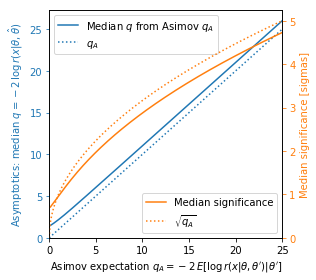

In [73]:
plt.figure(figsize=(4.5,4))

ax1 = plt.gca()
plt.plot(llr, median_q, color='C0', label='Median $q$ from Asimov $q_A$')
plt.plot(llr, llr, color='C0', ls='dotted', label='$q_A$')
ax1.tick_params('y', colors='C0')
ax1.set_ylabel(r"Asymptotics: median $q = -2 \, \log \, r(x | \theta, \hat{\theta})$", color='C0')
plt.ylim(0.,None)
ax1.legend(loc='upper left')

#plt.plot(llr, pvals)
#ax1.set_yscale("log", nonposy='clip')
#ax1.tick_params('y', colors='C0')
#ax1.set_ylabel('Median $p$-value', color='C0')

plt.xlim(0.,max_llr)
ax1.set_xlabel(r"Asimov expectation $q_A = -2 \, E[ \log \, r(x | \theta, \theta') | \theta']$")

ax2 = ax1.twinx()
ax2.plot(llr, significances, color='C1', label = 'Median significance')
ax2.plot(llr, naive, color='C1', ls='dotted', label = '$\sqrt{q_A}$')
plt.ylim(0.,None)
ax2.tick_params('y', colors='C1')
ax2.set_ylabel('Median significance [sigmas]', color='C1')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../figures/debug/asimov_p_values.pdf')